In [16]:
import pandas as pd
import pickle
from scipy import stats
import pandas as pd
import seaborn as sns
from cliffs_delta import cliffs_delta

In [17]:
# load data
final = pickle.load(open("../00_data/final/competence.pkl", "rb"))

In [18]:
# define high and low performer
final = final.sort_values(by=["ability"])
n = 10
low_performer = final.head(int(len(final) * (n / 100)))

final = final.sort_values(by=["ability"], ascending=False)
high_performer = final.head(int(len(final) * (n / 100)))

In [19]:
# split by interventiongroup
low_intvcontrol = low_performer[(low_performer["interventiongroup"] == "control")]
low_intv2 = low_performer[(low_performer["interventiongroup"] == "2")]
low_intv3 = low_performer[(low_performer["interventiongroup"] == "3")]
low_intv4 = low_performer[(low_performer["interventiongroup"] == "4")]
low_intv5 = low_performer[(low_performer["interventiongroup"] == "5")]
low_intv6 = low_performer[(low_performer["interventiongroup"] == "6")]

high_intvcontrol = high_performer[(high_performer["interventiongroup"] == "control")]
high_intv2 = high_performer[(high_performer["interventiongroup"] == "2")]
high_intv3 = high_performer[(high_performer["interventiongroup"] == "3")]
high_intv4 = high_performer[(high_performer["interventiongroup"] == "4")]
high_intv5 = high_performer[(high_performer["interventiongroup"] == "5")]
high_intv6 = high_performer[(high_performer["interventiongroup"] == "6")]

[Text(0.5, 0, 'Competence'), Text(0, 0.5, 'Count of users')]

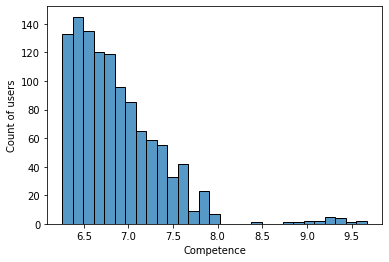

In [20]:
# plot ability of high performer
gr = sns.histplot(data=high_performer, x="ability")
gr.set(xlabel="Competence", ylabel="Count of users")

[Text(0.5, 0, 'Competence'), Text(0, 0.5, 'Count of users')]

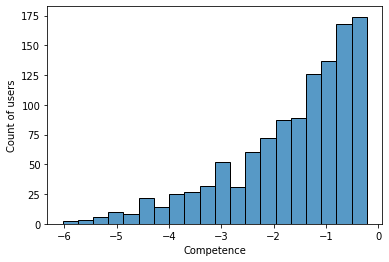

In [21]:
# plot ability of low performer
gr = sns.histplot(data=low_performer, x="ability")
gr.set(xlabel="Competence", ylabel="Count of users")

Get meand and median

In [22]:
# median high performer
ability_by_group = high_performer.groupby(["interventiongroup"]).agg(
    {"ability": "median", "Geschlecht": "count"}
)
ability_by_group = ability_by_group.rename(columns={"Geschlecht": "count"})

In [23]:
# median low performer
ability_by_group = low_performer.groupby(["interventiongroup"]).agg(
    {"ability": "median", "Geschlecht": "count"}
)
ability_by_group = ability_by_group.rename(columns={"Geschlecht": "count"})

In [24]:
# mean high performer
ability_by_group = high_performer.groupby(["interventiongroup"]).agg(
    {"ability": "mean", "Geschlecht": "count"}
)
ability_by_group = ability_by_group.rename(columns={"Geschlecht": "count"})

In [25]:
# mean low performer
ability_by_group = low_performer.groupby(["interventiongroup"]).agg(
    {"ability": "mean", "Geschlecht": "count"}
)
ability_by_group = ability_by_group.rename(columns={"Geschlecht": "count"})

Test significance

In [26]:
# Kruskal Wallis Test High Performer
stats.kruskal(
    high_intvcontrol["ability"],
    high_intv2["ability"],
    high_intv3["ability"],
    high_intv4["ability"],
    high_intv5["ability"],
    high_intv6["ability"],
)

KruskalResult(statistic=6.507018721646282, pvalue=0.25995928681685565)

In [27]:
# Kruskal Wallis Test Low Performer
stats.kruskal(
    low_intvcontrol["ability"],
    low_intv2["ability"],
    low_intv3["ability"],
    low_intv4["ability"],
    low_intv5["ability"],
    low_intv6["ability"],
)

KruskalResult(statistic=23.143861844516767, pvalue=0.00031684442303643286)

Wilcoxon Mann Whitney Tests and Cliffs Delta (# thresholds: .11 (small), .28 (medium), .43 (large))

In [28]:
# control group
groups = [low_intv2, low_intv3, low_intv4, low_intv5, low_intv6]
for x in groups:
    print(stats.mannwhitneyu(low_intvcontrol["ability"], x["ability"]))
    print(cliffs_delta(low_intvcontrol["ability"], x["ability"])[0])

MannwhitneyuResult(statistic=17510.5, pvalue=0.6543591869016049)
-0.026626643319714278
MannwhitneyuResult(statistic=15313.0, pvalue=0.175765005931398)
-0.08211952286758976
MannwhitneyuResult(statistic=18585.5, pvalue=0.7858207011172688)
0.016100814608277295
MannwhitneyuResult(statistic=31404.0, pvalue=0.003482300885483314)
0.15732448866777224
MannwhitneyuResult(statistic=14830.0, pvalue=0.18559740535116975)
0.08501609599063506


In [29]:
# Intv 2
groups = [low_intv3, low_intv4, low_intv5, low_intv6]
for x in groups:
    print(stats.mannwhitneyu(low_intv2["ability"], x["ability"]))
    print(cliffs_delta(low_intv2["ability"], x["ability"])[0])

MannwhitneyuResult(statistic=13992.0, pvalue=0.35029561710204504)
-0.058221713670323756
MannwhitneyuResult(statistic=16978.0, pvalue=0.48734053967653534)
0.04229848363926576
MannwhitneyuResult(statistic=28809.5, pvalue=0.000561309558583216)
0.19219946203186428
MannwhitneyuResult(statistic=13527.5, pvalue=0.090570273581283)
0.11136214262241209


In [30]:
# Intv 3
groups = [low_intv4, low_intv5, low_intv6]
for x in groups:
    print(stats.mannwhitneyu(low_intv3["ability"], x["ability"]))
    print(cliffs_delta(low_intv3["ability"], x["ability"])[0])

MannwhitneyuResult(statistic=16592.0, pvalue=0.11300519321586301)
0.09837150801006223
MannwhitneyuResult(statistic=27638.0, pvalue=4.279969265838257e-05)
0.23328871039714413
MannwhitneyuResult(statistic=13093.0, pvalue=0.01684403352884007)
0.15990432317505315


In [31]:
# Intv 4
print(stats.mannwhitneyu(low_intv4["ability"], low_intv5["ability"]))
print(cliffs_delta(low_intv4["ability"], low_intv5["ability"])[0])
print(stats.mannwhitneyu(low_intv4["ability"], low_intv6["ability"]))
print(cliffs_delta(low_intv4["ability"], low_intv6["ability"])[0])

MannwhitneyuResult(statistic=28201.0, pvalue=0.007684656902474841)
0.14778184778184777
MannwhitneyuResult(statistic=13266.5, pvalue=0.27254192382412445)
0.07195378151260504


In [32]:
# Intv 5
print(stats.mannwhitneyu(low_intv5["ability"], low_intv6["ability"]))
print(cliffs_delta(low_intv5["ability"], low_intv6["ability"])[0])

MannwhitneyuResult(statistic=16990.0, pvalue=0.219752570846944)
-0.07461873638344227


<AxesSubplot:xlabel='ability', ylabel='interventiongroup'>

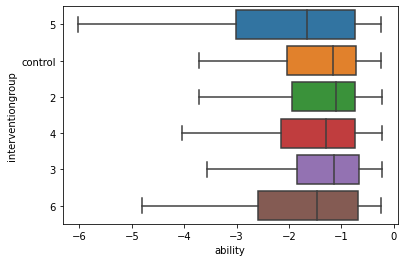

In [33]:
# plot low performer
sns.boxplot(
    data=low_performer, x="ability", y="interventiongroup", showfliers=False
)  # ,hue='Geschlecht'

<AxesSubplot:xlabel='ability', ylabel='interventiongroup'>

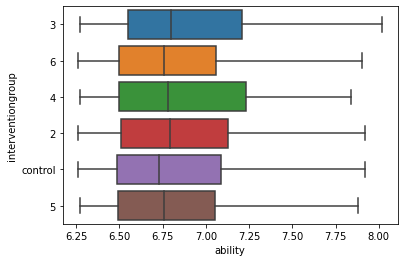

In [34]:
# plot high performer
sns.boxplot(
    data=high_performer, x="ability", y="interventiongroup", showfliers=False
)  # ,hue='Geschlecht'